In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [2]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df = pd.read_csv('Housing.csv', header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
scaler = preprocessing.StandardScaler()

In [7]:
scaler.fit(df.drop('MEDV',axis=1))
scaled_features = scaler.transform(df.drop('MEDV',axis=1))

In [8]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [9]:
Y=df['MEDV']
Y


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [10]:
##datasplt
X_train, X_test, y_train, y_test = train_test_split(X,Y
                                                    ,test_size=0.40 )
X_cv,X_test1,y_cv,y_test1=train_test_split(X_test,y_test
                                                    ,test_size=0.50)


In [11]:
X_train.shape,y_train.shape

((303, 13), (303,))

In [12]:
X_test1,y_test1

(         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
 59  -0.408498  0.585267 -0.876445 -0.272599 -0.878475 -0.509507 -0.760104   
 244 -0.396535  0.456508 -0.769931 -0.272599 -1.068519 -0.985343  0.281821   
 447  0.734469 -0.487722  1.015999 -0.272599  1.600725 -0.047918  0.996589   
 11  -0.406847  0.048772 -0.476654 -0.272599 -0.265154 -0.392685  0.509409   
 143  0.056310 -0.487722  1.231945 -0.272599  2.732346 -1.163425  1.117494   
 ..        ...       ...       ...       ...       ...       ...       ...   
 283 -0.418771  3.375039 -1.448410  3.668398 -1.327669  2.334112 -1.556661   
 115 -0.400578 -0.487722 -0.164408 -0.272599 -0.066472 -0.508082  0.697880   
 297 -0.404105 -0.487722  0.406098 -0.272599 -1.016689 -0.704685 -0.376050   
 151 -0.246386 -0.487722  1.231945 -0.272599  2.732346 -1.254603  1.117494   
 340 -0.413359 -0.487722 -0.867691 -0.272599 -0.342899 -0.451096 -0.358269   
 
           DIS       RAD       TAX   PTRATIO         B     LST

In [13]:
X_cv.shape,y_cv.shape

((101, 13), (101,))

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso
listofdegrees =[1,2,3,4,5,6,7,8,9,10]

listofMSE=[]
for i in listofdegrees:
    
    poly_reg = PolynomialFeatures(degree=i)
    X_poly_train = poly_reg.fit_transform(X_train)
    pol_reg = linear_model.LinearRegression()
    model=(pol_reg.fit(X_poly_train,y_train))
    
    x_poly_cv=poly_reg.fit_transform(X_cv)
    Y_predict=model.predict(x_poly_cv)
    listofMSE.append(mean_squared_error(y_cv, Y_predict))
listofMSE    



[22.96361880634647,
 12.954616184045772,
 5405.480287498104,
 1003.2242888567636,
 664.2668503562817,
 1675.3331775506488,
 19797.184569405334,
 78724.76155166529,
 2096970.3023233141,
 7819575.80367845]

In [15]:
listofdegrees[np.argmin(listofMSE)]


2

In [16]:
lamda=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
listoferror=[]
for i in lamda:
    ridge=Ridge(alpha=i)
    poly_reg = PolynomialFeatures(degree=2)
    X_poly_train_ridge = poly_reg.fit_transform(X_train)
    model_ridge=ridge.fit(X_poly_train_ridge,y_train)
    x_poly_cv_ridge=poly_reg.fit_transform(X_cv)
    Y_predict_ridge=model_ridge.predict(x_poly_cv_ridge)
    listoferror.append(mean_squared_error(y_cv, Y_predict_ridge))
listoferror
    
    

[10.435898824257425,
 11.5491978514624,
 11.214345911110453,
 10.746613040582986,
 10.214769029755711,
 9.695749474360213,
 9.222747063506556,
 8.846593489086914,
 8.722422946510925,
 8.988933791493505,
 9.53522085109031,
 10.074633423080527]

In [17]:
lamda[np.argmin(listoferror)]

1.28

In [18]:
poly_reg1_ridge= PolynomialFeatures(degree=listofdegrees[np.argmin(listofMSE)])

ridge=Ridge(alpha=5.12)
X_poly_train_ridge1 = poly_reg1_ridge.fit_transform(X_train)
model_ridge1=ridge.fit(X_poly_train_ridge1,y_train)
x_poly_test_ridge1=poly_reg1_ridge.fit_transform(X_test)
x_poly_test_ridge=poly_reg1_ridge.fit_transform(X_test1)
Y_predict_test_ridge=model_ridge1.predict(x_poly_test_ridge)


In [19]:
print('Coefficients:', model_ridge1.coef_)
print('Intercept:', model_ridge1.intercept_)
print('Mean squared error (MSE): %.2f'

      % mean_squared_error(y_test1, Y_predict_test_ridge))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test1, Y_predict_test_ridge))

Coefficients: [ 0.00000000e+00 -6.86857327e-02  3.72520516e-02 -4.27891787e-03
  1.20209223e-01 -1.13498019e+00  3.32913028e+00 -1.46800091e+00
 -2.60490040e+00  1.15928017e+00 -7.85934834e-01 -4.82012523e-01
 -1.96986279e-01 -3.44527606e+00  1.16326544e-01  4.26925504e-02
  1.43553914e-01  2.34861214e+00 -8.16577105e-01  2.26079563e-01
 -1.79919334e-01  1.80630921e-01 -7.16594525e-01  2.10735237e-01
 -1.14917835e-01  7.97918937e-02  5.56910693e-01  2.26500307e-01
 -2.60890801e-01  2.70139557e-02  6.18774638e-01  4.90779188e-02
 -4.14604248e-01 -4.00913726e-01  1.18362968e-01  5.85473734e-01
 -1.13847487e-01  3.97203795e-01  1.25622335e-01  7.49271339e-01
  1.63415023e-01  1.28383858e+00  6.14025069e-01  3.83548222e-01
  4.62945217e-01 -2.09504404e-01 -2.77383762e-01 -4.56990773e-01
  6.49950947e-02 -1.03464317e+00  4.08206393e-01 -8.52095189e-01
 -3.98380827e-01 -1.19529292e-01  4.57871239e-01  1.12627483e-01
  4.82216256e-01 -4.60611629e-02  3.68060143e-02  1.84537183e-01
 -6.6999958

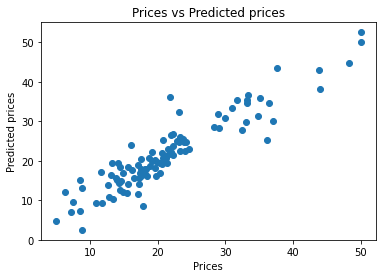

In [21]:
plt.scatter(y_test1, Y_predict_test_ridge)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()